<a href="https://colab.research.google.com/github/cavendano01/Data-Sciences-Galileo/blob/main/Image-Recognition/Lab2_MNIST_Text_Mining_%26_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
#Data Loading
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [69]:
dataset = pd.read_csv('/content/drive/MyDrive/Text-mining&Image-recognition/train.csv')

In [70]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
sampleX = dataset.iloc[4, 1:].values
sampleX = np.reshape(sampleX, (28,28))

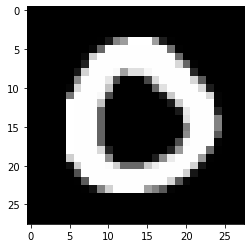

In [72]:
plt.imshow(sampleX, cmap="gray")

In [74]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

# ANN


In [77]:
#ANN
ann = Sequential()

#capa de entrada
ann.add(Dense(input_dim=784, units=3000, activation='relu', kernel_initializer='uniform'))

#primera capa oculta
ann.add(Dense(units=1000, activation='relu', kernel_initializer='uniform'))

#capa de salida
ann.add(Dense(units=10, activation='softmax'))

In [78]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
ann.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
460/460 [==============================] - 29s 62ms/step - loss: 0.3280 - accuracy: 0.9163
Epoch 2/10
460/460 [==============================] - 28s 62ms/step - loss: 0.1377 - accuracy: 0.9612
Epoch 3/10
460/460 [==============================] - 28s 62ms/step - loss: 0.1122 - accuracy: 0.9701
Epoch 4/10
460/460 [==============================] - 29s 62ms/step - loss: 0.0902 - accuracy: 0.9756
Epoch 5/10
460/460 [==============================] - 28s 62ms/step - loss: 0.0872 - accuracy: 0.9787
Epoch 6/10
460/460 [==============================] - 28s 62ms/step - loss: 0.0662 - accuracy: 0.9836
Epoch 7/10
460/460 [==============================] - 28s 62ms/step - loss: 0.0736 - accuracy: 0.9811
Epoch 8/10
460/460 [==============================] - 29s 62ms/step - loss: 0.0669 - accuracy: 0.9832
Epoch 9/10
460/460 [==============================] - 28s 62ms/step - loss: 0.0577 - accuracy: 0.9858
Epoch 10/10
460/460 [==============================] - 29s 62ms/step - loss: 0.050

In [80]:
ann.save('/content/drive/MyDrive/Text-mining&Image-recognition/ann.h5')


In [81]:
ann_predicts = ann.predict(X_test)

In [82]:
ann_predicts.shape

(12600, 10)

In [83]:
ann_predict_vals = np.argmax(ann_predicts, axis=1)
ann_predict_vals

array([8, 1, 9, ..., 3, 5, 0])

In [84]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test.values, ann_predict_vals)

0.8191269841269841

# CNN

In [85]:
#Preparación de Data para CNN
X_train_cnn = np.reshape(X_train, (X_train.shape[0], 28,28, 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], 28,28, 1))

In [86]:
X_train_cnn.shape

(29400, 28, 28, 1)

In [87]:
cnn = Sequential()

#----------------- fase de convolución -----------------

#primera capa de convoluciones
cnn.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

#capa de Max-Pooling
cnn.add(MaxPool2D(pool_size=(2,2)))

#segunda capa de convoluciones
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

#capa de Max-Pooling
cnn.add(MaxPool2D(pool_size=(2,2)))

#capa flatten
cnn.add(Flatten())

#----------------- fase de prediccion -----------------

#primera capa oculta.
cnn.add(Dense(units=128, activation='relu'))

#capa de salida
cnn.add(Dense(units=10, activation='softmax'))

In [88]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [89]:
history = cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=64)

Epoch 1/10
460/460 [==============================] - 33s 72ms/step - loss: 0.2282 - accuracy: 0.9307
Epoch 2/10
460/460 [==============================] - 33s 72ms/step - loss: 0.0633 - accuracy: 0.9803
Epoch 3/10
460/460 [==============================] - 33s 72ms/step - loss: 0.0435 - accuracy: 0.9860
Epoch 4/10
460/460 [==============================] - 33s 72ms/step - loss: 0.0336 - accuracy: 0.9897
Epoch 5/10
460/460 [==============================] - 33s 72ms/step - loss: 0.0237 - accuracy: 0.9930
Epoch 6/10
460/460 [==============================] - 33s 72ms/step - loss: 0.0191 - accuracy: 0.9936
Epoch 7/10
460/460 [==============================] - 33s 71ms/step - loss: 0.0185 - accuracy: 0.9940
Epoch 8/10
460/460 [==============================] - 32s 70ms/step - loss: 0.0131 - accuracy: 0.9956
Epoch 9/10
460/460 [==============================] - 32s 70ms/step - loss: 0.0128 - accuracy: 0.9960
Epoch 10/10
460/460 [==============================] - 32s 70ms/step - loss: 0.009

In [90]:
cnn.save('/content/drive/MyDrive/Text-mining&Image-recognition/cnn.h5')

In [91]:
predicsts = cnn.predict(X_test_cnn)

In [92]:
predicsts.shape

(12600, 10)

In [93]:
predicsts

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [94]:
predicsts[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [95]:
predict_val = np.argmax(predicsts, axis=1)
predict_val

array([8, 1, 9, ..., 3, 5, 0])

In [96]:
accuracy_score(y_test.values, predict_val)

0.9639682539682539